<a href="https://colab.research.google.com/github/bhave068/Devanagiri-Recognizer/blob/master/facial%20keypoint%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [0]:
train_data=pd.read_csv("/content/drive/My Drive/Facial keypoint detection/training.csv")
test_data=pd.read_csv("/content/drive/My Drive/Facial keypoint detection/test.csv")
lookid_data=pd.read_csv("/content/drive/My Drive/Facial keypoint detection/IdLookupTable.csv")

In [5]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [6]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [0]:
train_data.fillna(method='ffill',inplace=True)

In [8]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
train_data.shape

(7049, 31)

In [0]:
imag=[];
for i in range(0,7049):
  img=train_data['Image'][i].split(' ')
  img=['0' if x==''else x for x in img]
  imag.append(img)

In [0]:
image_list = np.array(imag,dtype = 'uint8')
X_train = image_list.reshape(-1,96,96,1)

In [0]:
del imag

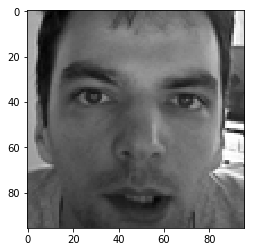

In [14]:
plt.imshow(X_train[5].reshape(96,96),cmap='gray')

In [0]:
training=train_data.drop('Image',axis=1)
y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y_train.append(y)
y_train=np.array(y_train,dtype='uint8')

In [20]:
y_train.shape

(7049, 30)

In [19]:
X_train.shape

(7049, 96, 96, 1)

In [0]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

In [0]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [0]:
model=Sequential()

In [0]:
model.add(Convolution2D(32,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))

In [0]:
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [0]:
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

In [0]:
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [0]:
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

In [0]:
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [0]:
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


In [0]:
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

In [0]:
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [0]:
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512,activation='relu'))

In [0]:
model.add(Dropout(0.1))

In [0]:
model.add(Dense(30))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 48, 48, 64)        18432     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 48, 48, 64)        256       
__________

In [0]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [48]:
model.fit(X_train,y_train,epochs=50,batch_size=256,validation_split=0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 23s 4ms/step - loss: 298.8848 - acc: 0.2417 - val_loss: 162.3867 - val_acc: 0.2631
Epoch 2/50
5639/5639 [==============================] - 12s 2ms/step - loss: 41.7286 - acc: 0.3444 - val_loss: 42.5435 - val_acc: 0.3369
Epoch 3/50
5639/5639 [==============================] - 12s 2ms/step - loss: 29.4387 - acc: 0.3949 - val_loss: 17.1955 - val_acc: 0.5681
Epoch 4/50
5639/5639 [==============================] - 12s 2ms/step - loss: 25.7703 - acc: 0.4378 - val_loss: 15.2316 - val_acc: 0.6227
Epoch 5/50
5639/5639 [==============================] - 12s 2ms/step - loss: 26.1823 - acc: 0.4683 - val_loss: 13.4710 - val_acc: 0.4901
Epoch 6/50
5639/5639 [==============================] - 12s 2ms/step - loss: 22.6747 - acc: 0.4604 - val_loss: 12.1310 - val_acc: 0.7028
Epoch 7/50
5639/5639 [==============================] - 12s 2ms/step - loss: 21.5411 - acc: 0.4971 - val_loss: 22.8460 - val_acc

In [0]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [0]:
timage_list = np.array(timag,dtype = 'uint8')
X_test = timage_list.reshape(-1,96,96,1) 

In [0]:
del timag

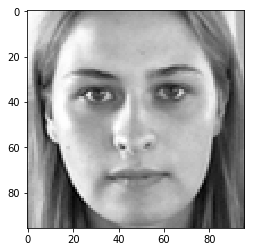

In [54]:
plt.imshow(X_test[20].reshape(96,96),cmap = 'gray')
plt.show()

In [0]:
pred = model.predict(X_test)

In [0]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [0]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [0]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [0]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [0]:
rowid = pd.Series(rowid,name = 'RowId')

In [0]:
loc = pd.Series(preded,name = 'Location')


In [0]:
submission = pd.concat([rowid,loc],axis = 1)

In [0]:
submission.to_csv('face_key_detection_submission.csv',index = False)